In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datos_merged_1986_2023.xlsx")

In [ ]:
#Xử lý dữ liệu xóa các cột không dùng đến
selected_columns = ['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                    'loudness', 'speechiness', 'tempo', 'valence', 'year', 'duration_min']
df = df[selected_columns]

In [ ]:
#Làm sạch dữ liệu xóa các dòng có giá trị Nan
data_clean = df.dropna()
data_clean = data_clean[~data_clean.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11445 entries, 0 to 11449
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        11445 non-null  int64  
 1   acousticness      11445 non-null  float64
 2   danceability      11445 non-null  float64
 3   energy            11445 non-null  float64
 4   instrumentalness  11445 non-null  float64
 5   liveness          11445 non-null  float64
 6   loudness          11445 non-null  float64
 7   speechiness       11445 non-null  float64
 8   tempo             11445 non-null  float64
 9   valence           11445 non-null  float64
 10  year              11445 non-null  int64  
 11  duration_min      11445 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 1.1 MB


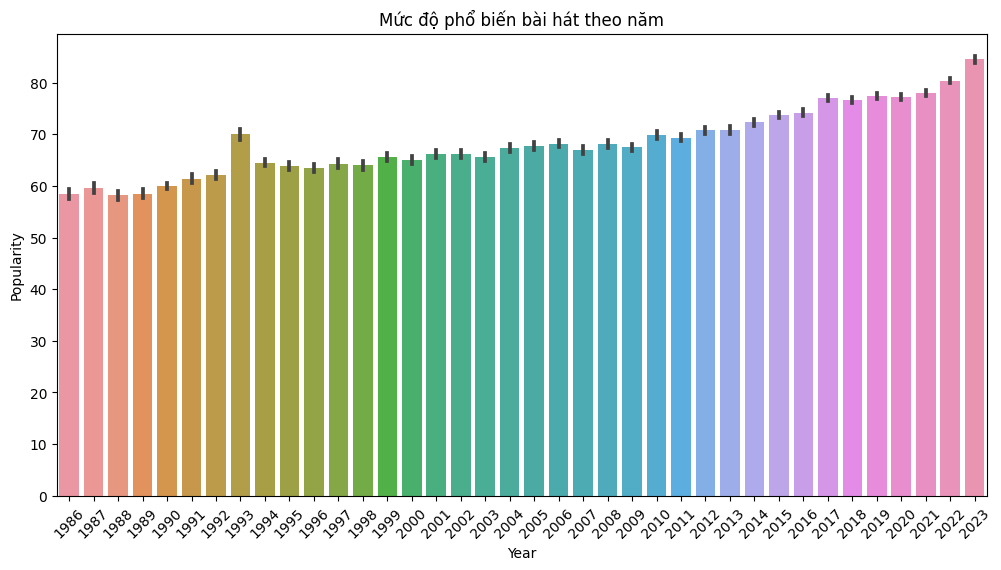

In [ ]:
# Biểu đồ cột (Bar Chart) hiển thị mức độ phổ biến bài hát theo năm
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='year', y='popularity')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title('Mức độ phổ biến bài hát theo năm')
plt.xticks(rotation=45)
plt.show()

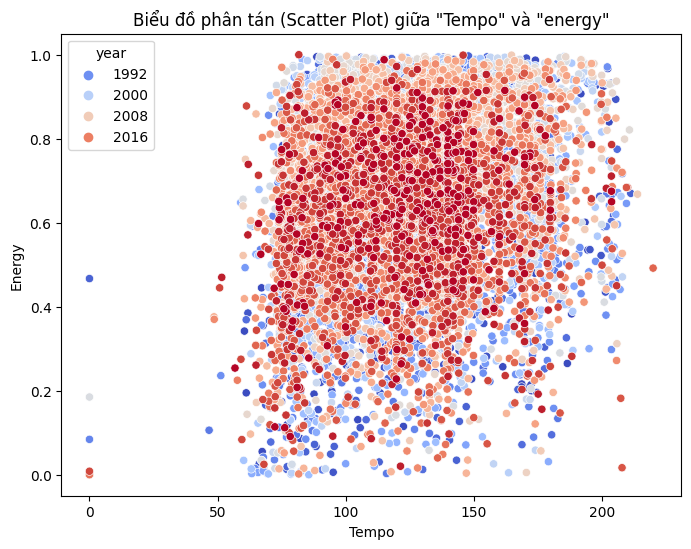

In [ ]:
#Biểu đồ phân tán (Scatter Plot) giữa "Tempo" và "energy"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_clean, x='tempo', y='energy', hue='year', palette='coolwarm')
plt.xlabel('Tempo')
plt.ylabel('Energy')
plt.title('Biểu đồ phân tán (Scatter Plot) giữa "Tempo" và "energy"')
plt.show()


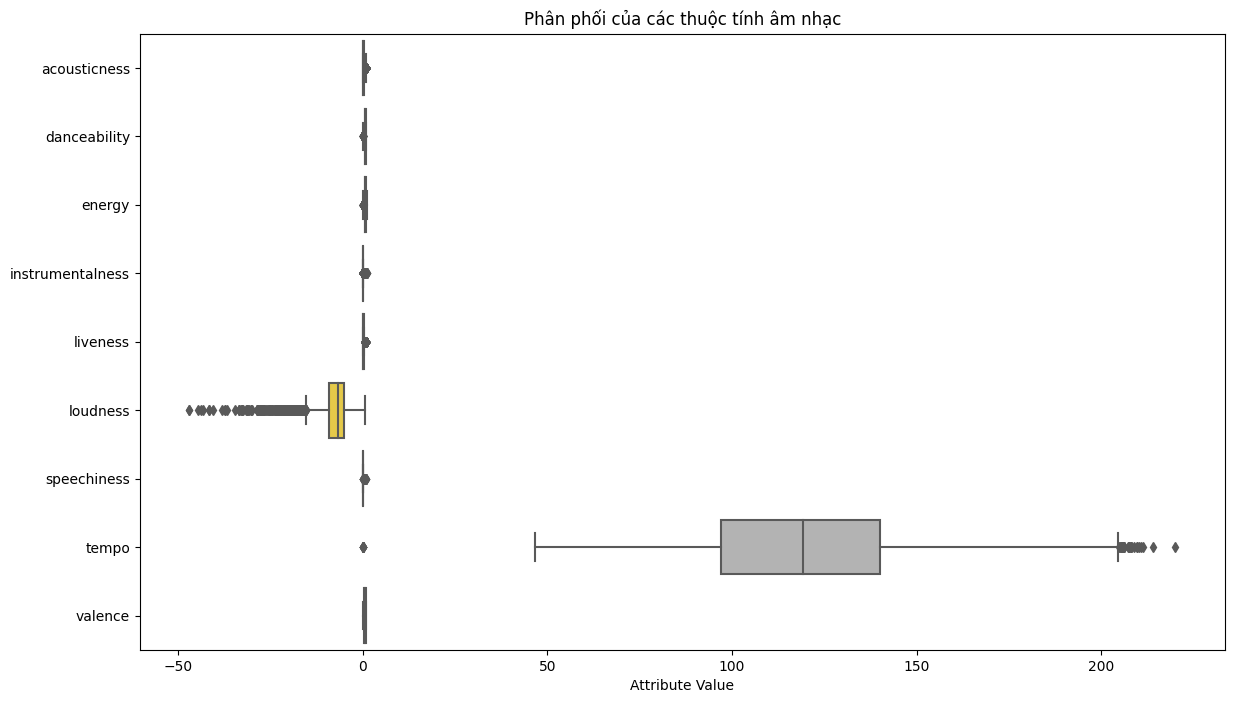

In [ ]:
#Biểu đồ Box Plot hiển thị phân phối của các thuộc tính âm nhạc
# Chọn các thuộc tính âm nhạc
music_attributes = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Tạo box plot cho từng thuộc tính âm nhạc
plt.figure(figsize=(14, 8))
sns.boxplot(data=data_clean[music_attributes], orient="h", palette="Set2")
plt.title("Phân phối của các thuộc tính âm nhạc")
plt.xlabel("Attribute Value")
plt.show()

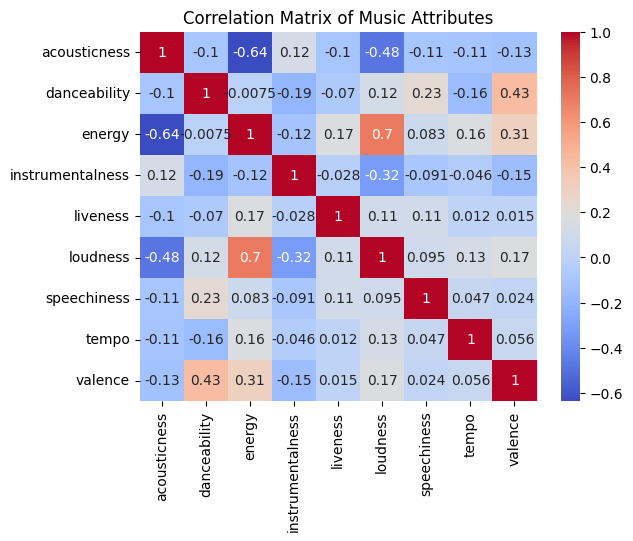

In [ ]:
#Tính toán hệ số tương quan Pearson giữa các thuộc tính âm nhạc
correlation_matrix = df[music_attributes].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Music Attributes')
plt.show()

Mô hình linear regression

In [ ]:
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

predictors = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                    'loudness', 'speechiness', 'tempo', 'valence', 'year', 'duration_min']
outcome = 'popularity'
X = data_clean[predictors]
y = data_clean[outcome]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)


In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

ypred = model.predict(X_test)
r2_linear = r2_score(y_test, ypred )
rmse_linear = mean_squared_error(y_test, ypred, squared=False)
print("R^2 =", r2_linear)
print("rmse =", rmse_linear)

R^2 = 0.4632144364498857
rmse = 6.968145932191945


Mô hình Bagging Regressor

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

predictors = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                    'loudness', 'speechiness', 'tempo', 'valence', 'year', 'duration_min']
outcome = 'popularity'
X = data_clean[predictors]
y = data_clean[outcome]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=1)
bg_model = BaggingRegressor()

bg_model.fit(X_train, y_train)

ypred_train = bg_model.predict(X_train)

r2 = metrics.r2_score(y_train, ypred_train)
rmse = metrics.mean_squared_error(y_train, ypred_train, squared=False)
print('Training data: R^2=%.3f (rmse=%.3f)' % (r2, rmse))

expected_y = y_test
ypred_test = bg_model.predict(X_test)
r2_bagging = metrics.r2_score(expected_y, ypred_test)
rmse_bagging = metrics.mean_squared_error(expected_y, ypred_test, squared=False)
print('Testing data: R^2=%.3f (rmse=%.3f)' % (r2_bagging, rmse_bagging))

Training data: R^2=0.899 (rmse=2.948)
Testing data: R^2=0.472 (rmse=6.910)


Mô hình Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

predictors = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                    'loudness', 'speechiness', 'tempo', 'valence', 'year', 'duration_min']
outcome = 'popularity'
X = data_clean[predictors]
y = data_clean[outcome]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
gb_model = GradientBoostingRegressor()

gb_model.fit(X_train, y_train)


ypred_train = gb_model.predict(X_train)
r2 = metrics.r2_score(y_train, ypred_train)
rmse = metrics.mean_squared_error(y_train, ypred_train, squared=False)
print('Training data: R^2=%.3f (rmse=%.3f)' % (r2, rmse))
expected_y = y_test
ypred_test = gb_model.predict(X_test)
r2_boosting = metrics.r2_score(expected_y, ypred_test)
rmse_boosting = metrics.mean_squared_error(expected_y, ypred_test, squared=False)
print('Testing data: R^2=%.3f (rmse=%.3f)' % (r2_boosting, rmse_boosting))

Training data: R^2=0.539 (rmse=6.374)
Testing data: R^2=0.493 (rmse=6.554)


mô hình DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

predictors = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                    'loudness', 'speechiness', 'tempo', 'valence', 'year', 'duration_min']
outcome = 'popularity'
X = data_clean[predictors]
y = data_clean[outcome]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeRegressor(max_depth=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

ypred_train = clf.predict(X_train)

mse = metrics.mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = metrics.r2_score(y_train, ypred_train)
rmse = metrics.mean_squared_error(y_train, ypred_train, squared=False)
print('Training data: R^2=%.3f (rmse=%.3f)' % (r2, rmse))

expected_y = y_test
ypred_test = clf.predict(X_test)
r2_DecisionTree = metrics.r2_score(expected_y, ypred_test)
rmse_DecisionTree = metrics.mean_squared_error(expected_y, ypred_test, squared=False)
print('Testing data: R^2=%.3f (rmse=%.3f)' % (r2_DecisionTree, rmse_DecisionTree))

Mean Squared Error: 47.17363335356752
Training data: R^2=0.482 (rmse=6.734)
Testing data: R^2=0.448 (rmse=6.868)


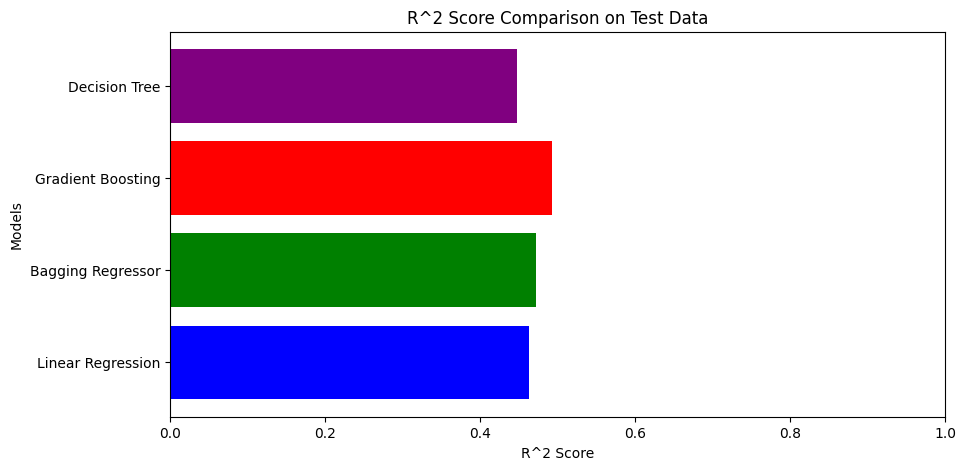

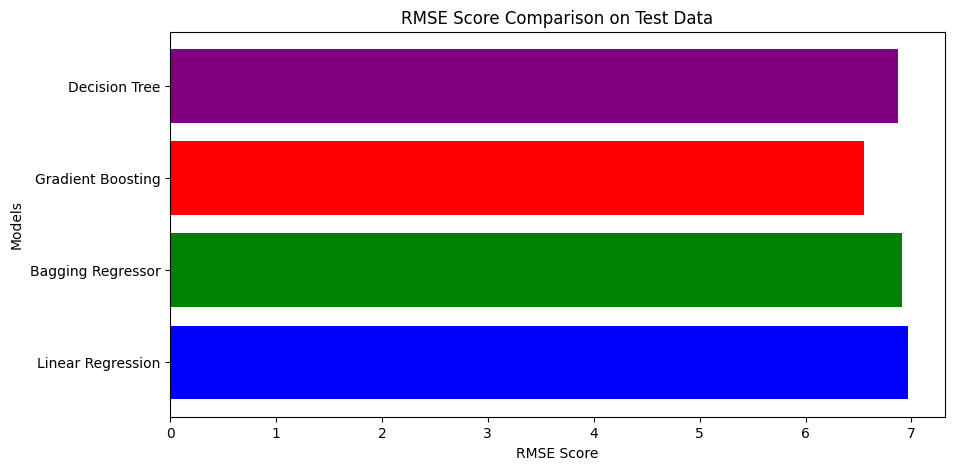

In [ ]:
import matplotlib.pyplot as plt

# Điểm dữ liệu
models = ['Linear Regression', 'Bagging Regressor', 'Gradient Boosting', 'Decision Tree']
r2_scores = [r2_linear, r2_bagging, r2_boosting, r2_DecisionTree]
rmse_scores = [rmse_linear, rmse_bagging, rmse_boosting, rmse_DecisionTree]

# Màu cho từng mô hình
colors = ['blue', 'green', 'red', 'purple']

# Vẽ biểu đồ R^2
plt.figure(figsize=(10, 5))
plt.barh(models, r2_scores, color=colors)
plt.ylabel('Models')  # Chuyển tên mô hình sang trục y
plt.xlabel('R^2 Score')
plt.title('R^2 Score Comparison on Test Data')
plt.xlim(0, 1)  # Điều chỉnh phạm vi trục x nếu cần
plt.show()

# Vẽ biểu đồ RMSE
plt.figure(figsize=(10, 5))
plt.barh(models, rmse_scores, color=colors)
plt.ylabel('Models')  # Chuyển tên mô hình sang trục y
plt.xlabel('RMSE Score')
plt.title('RMSE Score Comparison on Test Data')
plt.show()


In [ ]:
# Dự đoán
test = {
    'acousticness': 0.7,
    'danceability': 0.4,
    'energy': 0.2,
    'instrumentalness': 0.0000307,
    'liveness': 0.116,
    'loudness': -13.155,
    'speechiness': 0.0331,
    'tempo': 120.282,
    'valence': 0.268,
    'year': 2022,
    'duration_min': 3.79333333333333
}

# Chuyển đổi dữ liệu cần dự đoán thành DataFrame
test_df = pd.DataFrame([test])

# Sử dụng mô hình linear regression để dự đoán "popularity" cho ví dụ
predicted_popularity = model.predict(test_df)

#Sử dụng mô hình Bagging Regressor
predicted_popularity1 = bg_model.predict(test_df)

##Sử dụng mô hình Gradient Boosting
predicted_popularity2 = gb_model.predict(test_df)

#Sử dụng mô hình DecisionTree
predicted_popularity3 = clf.predict(test_df)

# In ra kết quả dự đoán
print("Predicted Popularity with Linear Regression :", predicted_popularity[0])
print("Predicted Popularity with Bagging Regressor:", predicted_popularity1[0])
print("Predicted Popularity with Gradient Boosting:", predicted_popularity2[0])
print("Predicted Popularity with DecisionTree:", predicted_popularity2[0])

Predicted Popularity with Linear Regression : 77.34816950428376
Predicted Popularity with Bagging Regressor: 77.4
Predicted Popularity with Gradient Boosting: 80.07874198776706
Predicted Popularity with DecisionTree: 80.07874198776706
